## 2020 Houseless Count and Toilets Mapped
### Kevin Liu, Paola Tirado Escareno, Carolyn Chu

*What we've done:*
- From the parks dataset, pulled parks with toilets and used osmnx to geocode park addresses
- Joined parks toilet dataset with LACAN's geojson of handwashing stations and toilets
- Joined census explorer data and Economic Roundtable LA Homeless County 2020 by Census Tract data
- Layered the spatial data using pyplot and contextily (this notebook)

*Where we're going to/hoping to do:*
- Using the Socrata API, pull County and City Library data to add to our toilets dataset
- Spatially join toilet data and homeless county data to find # of toilets per unhoused people
- Use a spatial cluster analysis to find patterns across toilet locations
- Final deliverables will include an calculation of average # of toilets per capita; spatial culster analysis, suite of maps (including a focus on San Fernando Valley and Skid Row)

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [6]:
toilets = gpd.read_file('toilets.geojson').to_crs(epsg=3857)

In [7]:
toilets.sample(10)

,name,type,geometry
201,Long Beach Ave and 22nd St,LAHSA Handwashing Station,POINT (-118.243 34.017)
7,Denker Recreation Center,LA Parks,POINT (-118.305 34.024)
242,4401 Crenshaw Blvd,LAHSA Handwashing Station,POINT (-118.332 34.003)
173,Laurel Canyon and 101 freeway,LAHSA Handwashing Station,POINT (-118.396 34.181)
55,33rd/Main,LAHSA Handwashing Station,POINT (-118.272 34.019)
261,SE corner Rose & 3rd,LAHSA Handwashing Station,POINT (-118.476 33.997)
181,Sunset & LaBrea,LAHSA Handwashing Station,POINT (-118.344 34.098)
170,Lankershim Boulevard & Riverside Drive,LAHSA Handwashing Station,POINT (-118.367 34.152)
76,Beacon Avenue (Between 7th and 8th St),LAHSA Handwashing Station,POINT (-118.273 34.054)
256,"Arcadia and Main St, Overpass",LAHSA Handwashing Station,POINT (-118.240 34.055)


In [15]:
counts = gpd.read_file('2020countbytract_final.geojson')

In [16]:
counts.head(5)

,NAMELSAD10,FID_LA_Cou,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,Non-CoC Flag,Non-CoC Place,NAME10,CT_NAME,...,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,FID_Servic,SPA_NAME,SPA_2012,LACityCD12,LA_CoSupDist11,geometry
0,Census Tract 1011.10,1463,6,37,101110,6037101110,1,Great LA Continuum of Care,1011.10,Tujunga Canyon Blvd,...,1142405,0,34.259474,-118.292987,1,SPA 2: San Fernando,2,7.0,5,"POLYGON ((-13169350.79000 4063591.83000, -1316..."
1,Census Tract 1011.22,671,6,37,101122,6037101122,1,Great LA Continuum of Care,1011.22,None,...,2644043,0,34.267721,-118.290147,1,SPA 2: San Fernando,2,7.0,5,"POLYGON ((-13169467.90000 4065613.94000, -1316..."
2,Census Tract 1012.10,1445,6,37,101210,6037101210,1,Great LA Continuum of Care,1012.10,Little Landers Park,...,650691,0,34.252972,-118.290731,1,SPA 2: San Fernando,2,7.0,5,"POLYGON ((-13169034.65000 4063225.63000, -1316..."
3,Census Tract 1012.20,1703,6,37,101220,6037101220,1,Great LA Continuum of Care,1012.20,Haines Canyon Ave,...,698967,0,34.251609,-118.281632,1,SPA 2: San Fernando,2,7.0,5,"POLYGON ((-13167528.94000 4062726.77000, -1316..."
4,Census Tract 1013,1578,6,37,101300,6037101300,1,Great LA Continuum of Care,1013.00,Mt. Glesson Ave,...,2580401,0,34.248778,-118.270999,1,SPA 2: San Fernando,2,7.0,5,"POLYGON ((-13166671.67000 4062511.96000, -1316..."


In [19]:
# Renaming count column

counts = counts.rename(columns = {'FID_LA_Cou':'Count'})

# Keeping only counts and tract geometries from the counts gdf

counts = counts[['Count', 'geometry']]

<AxesSubplot:>

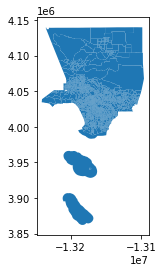

In [30]:
counts = counts.to_crs(epsg=4326)
counts.plot()

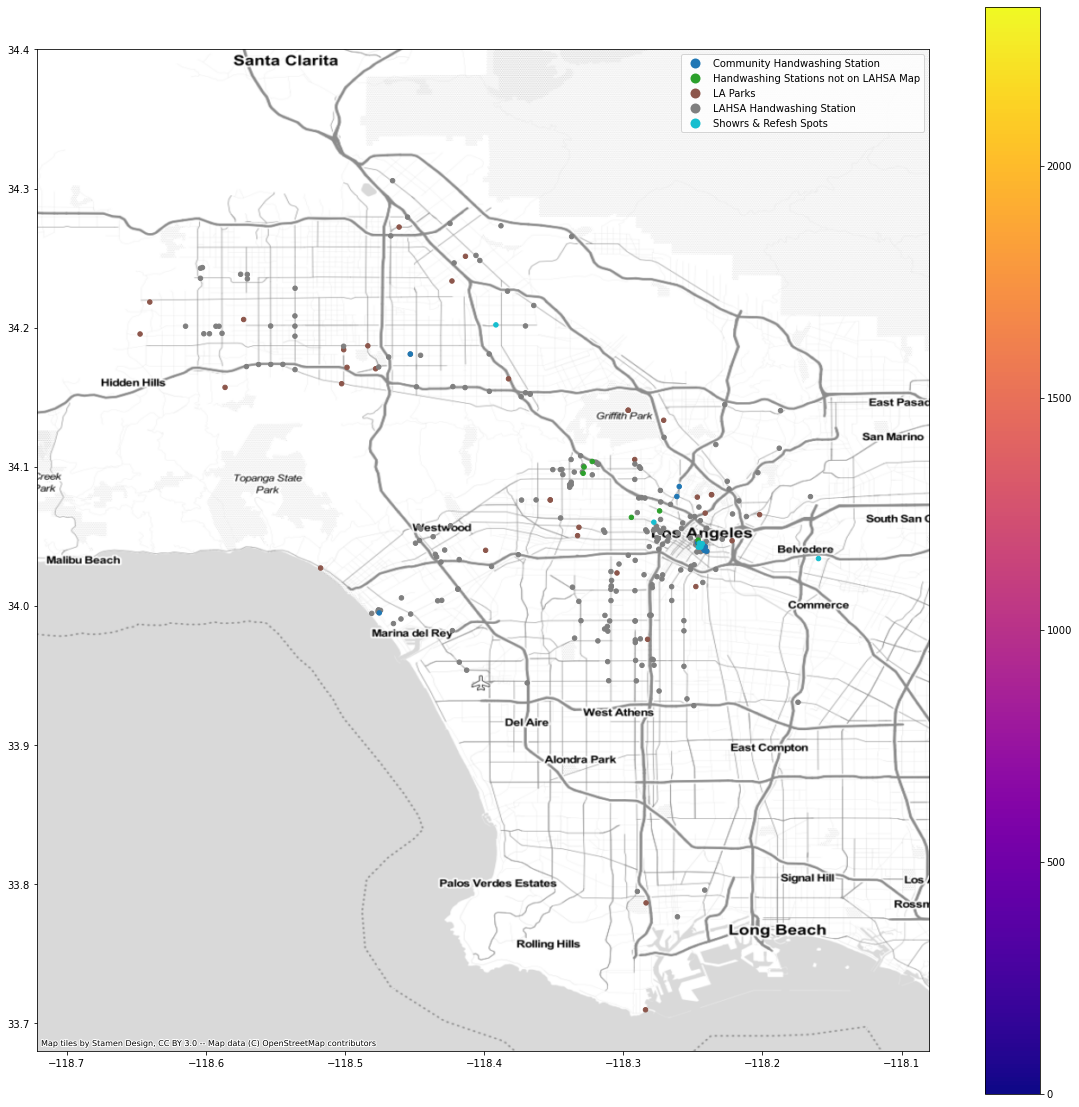

In [26]:
# Plotting both toilets and counts on the same map

f, ax = plt.subplots(figsize=(20,20))

toilets.plot('type', ax=ax, marker='o', markersize=20, legend=True)

counts.plot('Count', ax=ax, cmap='plasma', legend=True, legend_kwds={'orientation': 'vertical'}, alpha=0.2, label='Count')

ax.set_xlim([-118.721783, -118.08]) 
ax.set_ylim([33.68, 34.4])

ctx.add_basemap(ax,crs='EPSG:4326', source=ctx.providers.Stamen.TonerLite)

plt.show()